<h1><center><span style="color:#6b9b95">Spacy</span></center></h1>

# Features
- Named entity recognition
- Support for 61+ languages
- 46 statistical models for 16 languages
- Pretrained word vectors
- State-of-the-art speed
- Part-of-speech tagging
- Labelled dependency parsing
- Built in visualizers for syntax and NER
- Easy model packaging and deployment
- Robust, rigorously evaluated accuracy

In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Processing Pipeline
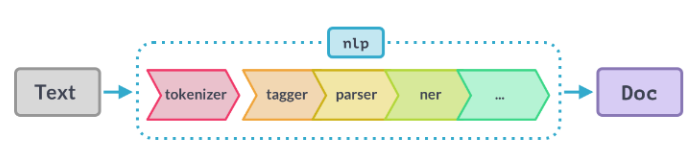

In [28]:
# Create an nlp object
doc = nlp("she played chess against rita she likes playing chess.")

In [29]:
# Create an nlp object
nlp.pipe_names

['tagger', 'parser', 'ner']

## Tokenization
- Tokenization is the process of converting a text into smaller sub-texts, based on certain predefined rules.
- This is typically the first step for NLP tasks like text classification, sentiment analysis, etc.

In [30]:
# Printing the tokens of a doc
for token in doc:
    print(token.text)

she
played
chess
against
rita
she
likes
playing
chess
.


## Text-Preprocessing
- The process of removing noise from the doc is called Text Cleaning or Preprocessing.

In [32]:
# Printing tokens and boolean values stored in different attributes
for token in doc:
    print(token.text,'--',token.is_stop,'---',token.is_punct)

she -- True --- False
played -- False --- False
chess -- False --- False
against -- True --- False
rita -- False --- False
she -- True --- False
likes -- False --- False
playing -- False --- False
chess -- False --- False
. -- False --- True


## Part-of-Speech (POS) Tagging

In [13]:
# Iterate over the tokens
for token in doc:
    # Print the token and its part-of-speech tag
    print(token.text, "-->", token.pos_)

she --> PRON
played --> VERB
chess --> NOUN
against --> ADP
rita --> PROPN
she --> PRON
likes --> VERB
playing --> VERB
chess --> NOUN
. --> PUNCT


In [15]:
# Explain pos tag
spacy.explain("PROPN")

'proper noun'

## Lemmatization

In [18]:
for token in doc:
    print(token.text, token.lemma_)

she -PRON-
played play
chess chess
against against
rita rita
she -PRON-
likes like
playing play
chess chess
. .


## Detecting Email Addresses

In [20]:
# text containing employee details
employee_text=""" name : Koushiki age: 45 email : koushiki@gmail.com
                 name : Gayathri age: 34 email: gayathri1999@gmail.com
                 name : Ardra age: 60 email : ardra@gmail.com
                 name : pratham parmar age: 15 email : parmar15@yahoo.com
                 name : Shashank age: 54 email: shank@rediffmail.com
                 name : Utkarsh age: 46 email :utkarsh@gmail.com"""

# creating a spacy doc          
employee_doc=nlp(employee_text)

# Printing the tokens which are email through `like_email` attribute
for token in employee_doc:
    if token.like_email:
        print(token.text)

koushiki@gmail.com
gayathri1999@gmail.com
ardra@gmail.com
parmar15@yahoo.com
shank@rediffmail.com
utkarsh@gmail.com


### Other token attributes
- token.is_alpha : Returns True if the token is an alphabet
- token.is_ascii : Returns True if the token belongs to ascii characters
- token.is_digit : Returns True if the token is a number(0-9)
- token.is_upper : Returns True if the token is upper case alphabet
- token.is_lower : Returns True if the token is lower case alphabet
- token.is_space : Returns True if the token is a space ‘ ‘
- token.is_bracket : Returns True if the token is a bracket
- token.is_quote : Returns True if the token is a quotation mark
- token.like_url : Returns True if the token is similar to a URl (link to website)

## Dependency Parsing
Every sentence has a grammatical structure to it and with the help of dependency parsing, we can extract this structure. It can also be thought of as a directed graph, where nodes correspond to the words in the sentence and the edges between the nodes are the corresponding dependencies between the word.

In [21]:
# dependency parsing
for token in doc:
    print(token.text, "-->", token.dep_)

she --> nsubj
played --> ccomp
chess --> dobj
against --> prep
rita --> pobj
she --> nsubj
likes --> ROOT
playing --> xcomp
chess --> dobj
. --> punct


In [24]:
from spacy import displacy
# displaying tokens with their POS tags
displacy.render(doc,style='dep',jupyter=True)

## Named Entity Recognition
Have a look at this text “John works at Google″. In this, ” John ” and ” Google ” are names of a person and a company. These words are referred as named-entities. They are real-world objects like name of a company , place,etc..

In [25]:
# Preparing the spaCy document
text='Tony Stark owns the company StarkEnterprises . Emily Clark works at Microsoft and lives in Manchester. She loves to read the Bible and learn French'
doc=nlp(text)

# Printing the named entities
print(doc.ents)

(Tony Stark, StarkEnterprises, Emily Clark, Microsoft, Manchester, Bible, French)


### Supported Named Entities
- PERSON : Denotes names of people
- GPE : Denotes places like counties, cities, states.
- ORG : Denotes organizations or companies
- WORK_OF_ART : Denotes titles of books, fimls,songs and other arts
- PRODUCT : Denotes products such as vehicles, food items ,furniture and so on.
- EVENT : Denotes historical events like wars, disasters ,etc…
- LANGUAGE : All the recognized languages across the globe.

In [26]:
# Using displacy for visualizing NER
from spacy import displacy
displacy.render(doc,style='ent',jupyter=True)

## Rule-Based Matching
- There will be situations like these, where you’ll need extract specific pattern type phrases from the text. This is called Rule-based matching.

### Token Matcher
The procedure to implement a token matcher is:

1. Initialize a Matcher object
2. Define the pattern you want to match
3. Add the pattern to the matcher
4. Pass the text to the matcher to extract the matching positions.

In [36]:
from spacy.matcher import Matcher

In [37]:
# Initializing the matcher with vocab
matcher = Matcher(nlp.vocab)
matcher

In [38]:
# Define the matching pattern
my_pattern=[{"LOWER": "version"}, {"IS_PUNCT": True}, {"LIKE_NUM": True}]

# Define the token matcher
matcher.add('VersionFinder', None, my_pattern)

In [39]:
# Run the Token Matcher
my_text = 'The version : 6 of the app was released about a year back and was not very sucessful. As a comeback, six months ago, version : 7 was released and it took the stage. After that , the app has has the limelight till now. On interviewing some sources, we get to know that they have outlined visiond till version : 12 ,the Ultimate.'
my_doc = nlp(my_text)

desired_matches = matcher(my_doc)
desired_matches

[(6950581368505071052, 1, 4),
 (6950581368505071052, 27, 30),
 (6950581368505071052, 65, 68)]

In [40]:
# Extract the matches
for match_id, start, end in desired_matches :
    string_id = nlp.vocab.strings[match_id] 
    span = my_doc[start:end] 
    print(span.text)

version : 6
version : 7
version : 12


#### Extract engineering branches
The desired pattern : _ Engineering. The first token is usually a NOUN (eg: computer, civil), but sometimes it is an ADJ (eg: transportation, etc.)

In [41]:
# Parse text
engineering_text = """If you study aeronautical engineering, you could specialize in aerodynamics, aeroelasticity, 
composites analysis, avionics, propulsion and structures and materials. If you choose to study chemical engineering, you may like to
specialize in chemical reaction engineering, plant design, process engineering, process design or transport phenomena. Civil engineering is the professional practice of designing and developing infrastructure projects. This can be on a huge scale, such as the development of
nationwide transport systems or water supply networks, or on a smaller scale, such as the development of single roads or buildings.
specializations of civil engineering include structural engineering, architectural engineering, transportation engineering, geotechnical engineering,
environmental engineering and hydraulic engineering. Computer engineering concerns the design and prototyping of computing hardware and software. 
This subject merges electrical engineering with computer science, oldest and broadest types of engineering, mechanical engineering is concerned with the design,
manufacturing and maintenance of mechanical systems. You’ll study statics and dynamics, thermodynamics, fluid dynamics, stress analysis, mechanical design and
technical drawing"""

doc = nlp(engineering_text)

In [42]:
# Initializing the matcher
matcher = Matcher(nlp.vocab)

# Write a pattern that matches a form of "noun/adjective"+"engineering"
my_pattern = [{"POS": {"IN": ["NOUN", "ADJ"]}}, {"LOWER": "engineering"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("identify_courses", None,my_pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the matching text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 15
Match found: aeronautical engineering
Match found: chemical engineering
Match found: reaction engineering
Match found: process engineering
Match found: Civil engineering
Match found: civil engineering
Match found: structural engineering
Match found: architectural engineering
Match found: transportation engineering
Match found: geotechnical engineering
Match found: environmental engineering
Match found: hydraulic engineering
Match found: Computer engineering
Match found: electrical engineering
Match found: mechanical engineering
